In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [2]:
master_df = pd.read_csv('../../../big-datasets/master_dataframe_metacyc.csv.gz', compression='gzip')

In [3]:
master_df.drop(columns='Fingerprint', inplace=True)

In [4]:
master_df.drop(columns='Promiscuous', inplace=True)

In [5]:
#master_df.set_index('PubChemID', drop=True, inplace=True)
master_df.head()

,Enzyme,product,reacts,PubChemID,SMILES,n_C,n_H,n_O,n_N,n_P,...,n_DoU,MW,Dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7
0,1.14.14.80,CPD-10515,1.0,25201835,CCCCCCCCC(C(CCCCCCCC(=O)[O-])O)O,18,35,4,0,0,...,1,315.474,0.714718,1,0,0,0,0,0,0
1,1.14.14.80,PALMITATE,1.0,504166,CCCCCCCCCCCCCCCC(=O)[O-],16,31,2,0,0,...,1,255.422,0.714718,1,0,0,0,0,0,0
2,1.14.14.80,OLEATE-CPD,1.0,5460221,CCCCCCCCC=CCCCCCCCC(=O)[O-],18,33,2,0,0,...,2,281.460,0.714718,1,0,0,0,0,0,0
3,1.14.14.80,STEARIC_ACID,1.0,3033836,CCCCCCCCCCCCCCCCCC(=O)[O-],18,35,2,0,0,...,1,283.476,0.714718,1,0,0,0,0,0,0
4,1.14.14.80,CPD-10514,1.0,19746553,CCCCCCCCC1C(O1)CCCCCCCC(=O)[O-],18,33,3,0,0,...,2,297.459,0.714718,1,0,0,0,0,0,0


In [6]:
feature_df = master_df[['PubChemID', 'Dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
        'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'n_DoU']]
feature_df.set_index(keys=['PubChemID'], inplace=True)
feature_df.head()

,Dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_O,n_N,n_P,n_S,n_X,n_DoU
PubChemID,,,,,,,,,,,,,,
25201835,0.714718,1,0,0,0,0,0,0,4,0,0,0,0,1
504166,0.714718,1,0,0,0,0,0,0,2,0,0,0,0,1
5460221,0.714718,1,0,0,0,0,0,0,2,0,0,0,0,2
3033836,0.714718,1,0,0,0,0,0,0,2,0,0,0,0,1
19746553,0.714718,1,0,0,0,0,0,0,3,0,0,0,0,2


full_feature = master_df[['Dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW']]
full_feature.head()

full_features = np.array(full_feature) #shape balance array for regression
full_reactions = list(master_df['reacts'])

full_feature_train, full_feature_test, full_reaction_train, full_reaction_test = train_test_split(full_features, full_reactions,
                                                    test_size=0.20, random_state=42)

In [7]:
features = np.array(feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [13]:
feature_scaler = StandardScaler()
fft = feature_scaler.fit_transform(feature_train)
full_feature_train = fft
fft = feature_scaler.fit_transform(feature_test)
full_feature_test = fft

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_param1 = {
    'solver': ['liblinear','saga'],
    'class_weight': ['balanced', None]    
}

In [16]:
logistic = linear_model.LogisticRegression(solver='liblinear', penalty='l2', random_state=9, max_iter=1000)

In [17]:
gd_sr = GridSearchCV(logistic, grid_param1, cv=5, n_jobs=-1)

In [ ]:
best_model = gd_sr.fit(features, reactions)

In [ ]:
print(gd_sr.best_params_)

In [ ]:
logmodel = linear_model.LogisticRegression(solver='liblinear',penalty='l2', random_state=9, max_iter=1000)

In [ ]:
logmodel.fit(feature_train, reaction_train)

In [ ]:
logmodel.predict(feature_test)

In [ ]:
logit_roc_auc = roc_auc_score(reaction_test, logmodel.predict(feature_test))

fpr, tpr, thresholds = roc_curve(reaction_test, logmodel.predict_proba(feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='LogReg (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

score = logmodel.score(feature_test, reaction_test)
print('The model score is ' + str(round(score*100, 2)) + '%.')

## logreg is a no go

In [ ]:
grid_param2 = {
    'solver': ['newton-cg', 'lbfgs', 'sag'],    
}

_____

In [ ]:
from sklearn.svm import SVC ##### do we want svr or svc?

In [ ]:
svclassifier = SVC(kernel='linear')

In [79]:
grid_param3 = {
    'class_weight': ['balanced', None],
}

In [80]:
gd_sr = GridSearchCV(svclassifier, grid_param3, cv=5)

In [81]:
best_model = gd_sr.fit(features, reactions)

In [82]:
print(gd_sr.best_params_)

{'class_weight': None}


In [95]:
svmodel = SVC(kernel='linear', probability=True)

In [96]:
svmodel.fit(feature_train,reaction_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [97]:
svmodel.predict(feature_test)

array([0., 0., 0., ..., 0., 0., 0.])

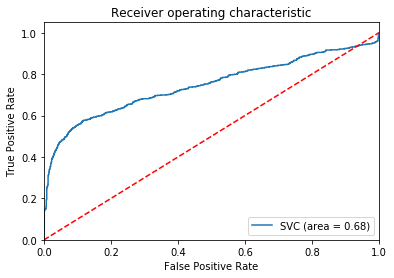

The model score is 77.51%.


In [98]:
logit_roc_auc = roc_auc_score(reaction_test, svmodel.predict(feature_test))

fpr, tpr, thresholds = roc_curve(reaction_test, svmodel.predict_proba(feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

score = svmodel.score(feature_test, reaction_test)
print('The model score is ' + str(round(score*100, 2)) + '%.')

## svc is a no go

_______

In [9]:
rfc=RandomForestClassifier(random_state=9, max_depth=16, max_features='auto', criterion='gini')

In [83]:
param_grid4 = { 
    'class_weight': ['balanced','balanced_subsample',None]
}
param_grid5 = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [84]:
#### going to need to change the name of the training data here
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid4, cv= 5)
CV_rfc.fit(features, reactions)

C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:2

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced', 'balanced_subsample', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print(CV_rfc.best_params_)

{'class_weight': 'balanced_subsample'}


In [8]:
rfc1=RandomForestClassifier(random_state=9, class_weight='balanced_subsample',max_features='auto', n_estimators= 134, max_depth=16, criterion='gini')

In [9]:
rfc1.fit(feature_train, reaction_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=16, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=134, n_jobs=None, oob_score=False, random_state=9,
            verbose=0, warm_start=False)

In [10]:
pred=rfc1.predict(feature_test)

In [11]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(reaction_test,pred))

Accuracy for Random Forest on CV data:  0.8404533565823888


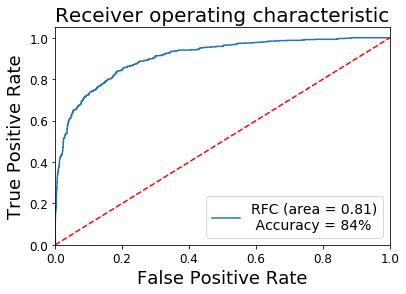

The model score is 8405.0%.


In [29]:
logit_roc_auc = roc_auc_score(reaction_test, rfc1.predict(feature_test))

fpr, tpr, thresholds = roc_curve(reaction_test, rfc1.predict_proba(feature_test)[:,1])
score = rfc1.score(feature_test, reaction_test)
score = (round(score*100,2))
plt.figure()
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % logit_roc_auc + '\n Accuracy = %0.f' % score + '%')
plt.plot()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RRF_ROC.png', dpi=500, format='png')
plt.show()



print('The model score is ' + str(round(score*100, 2)) + '%.')

## RFC it is!

_____

## Feature Selection

In [30]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Feature ranking:
1. feature 0 (0.556807)
2. feature 6 (0.088267)
3. feature 1 (0.065799)
4. feature 13 (0.062316)
5. feature 8 (0.059894)
6. feature 10 (0.042512)
7. feature 9 (0.034655)
8. feature 2 (0.031047)
9. feature 3 (0.017820)
10. feature 11 (0.015465)
11. feature 4 (0.007416)
12. feature 12 (0.006976)
13. feature 5 (0.006405)
14. feature 7 (0.004622)


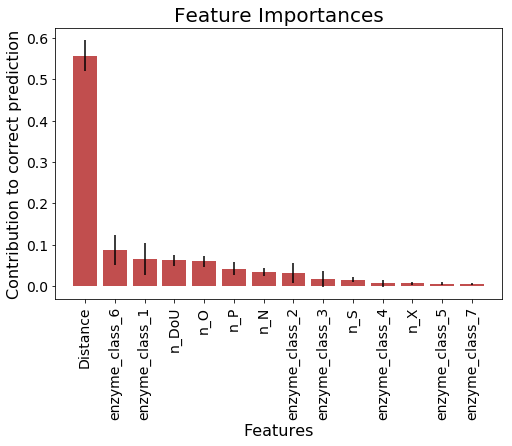

In [33]:
forest = ExtraTreesClassifier(n_estimators=134,
                              random_state=9,criterion='gini', max_depth=16)

forest.fit(features, reactions)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
labels_dic = {
    0: 'Distance',
    1: 'enzyme_class_1',
    2: 'enzyme_class_2',
    3: 'enzyme_class_3',
    4: 'enzyme_class_4',
    5: 'enzyme_class_5',
    6: 'enzyme_class_6',
    7: 'enzyme_class_7',
    8: 'n_O',
    9: 'n_N',
    10: 'n_P',
    11: 'n_S',
    12: 'n_X',
    13: 'n_DoU'   
}
labels = [labels_dic.get(x) for x in indices]
columns = ['Dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
        'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'n_DoU']
plt.figure(figsize=(8,5))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(features.shape[1]), importances[indices],
       color='firebrick', alpha=0.8, yerr=std[indices], align='center')
plt.xticks(range(features.shape[1]), labels,rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-1, features.shape[1]])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Contribution to correct prediction', fontsize=16)
plt.savefig('Feature_importance', dpi=400, format='png')
plt.show()

In [11]:
from sklearn.feature_selection import RFECV

In [12]:
estimator = rfc1
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(features, reactions)
print(selector.support_,selector.ranking_)

[ True  True  True  True False False  True False  True  True  True  True
  True  True] [1 1 1 1 2 3 1 4 1 1 1 1 1 1]


In [13]:
from sklearn.decomposition import PCA